<a href="https://colab.research.google.com/github/riya461/Learn_ML/blob/main/Algorithms/PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read - https://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html

- ranked based on citation
- the incoming nodes determine popularity contest


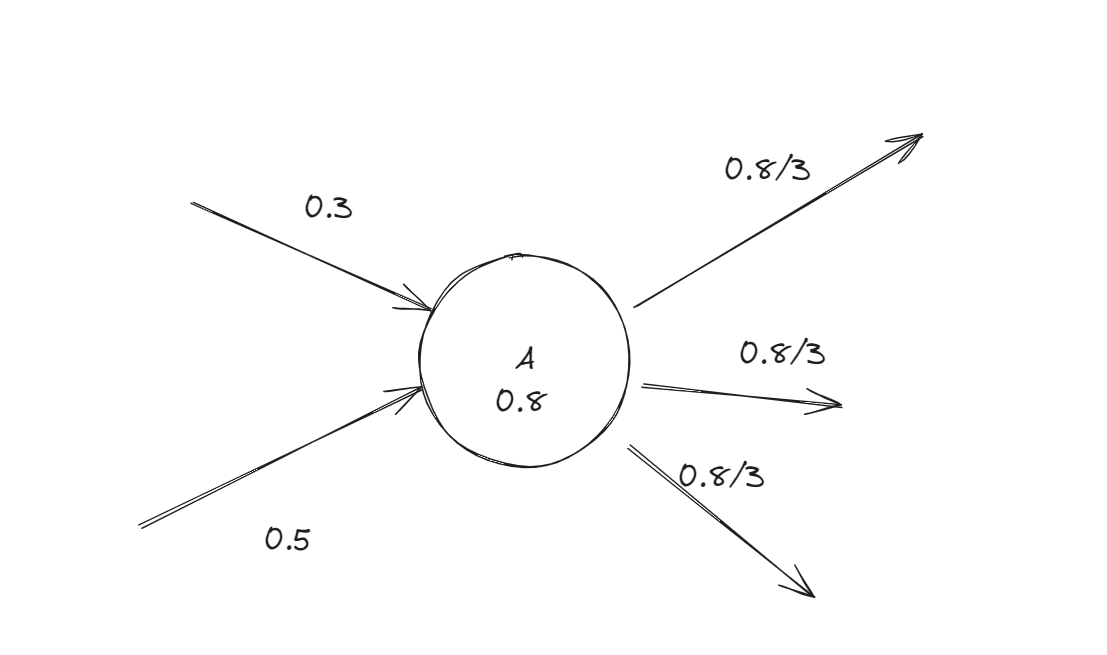

Taking an example from down to see the picture as a whole


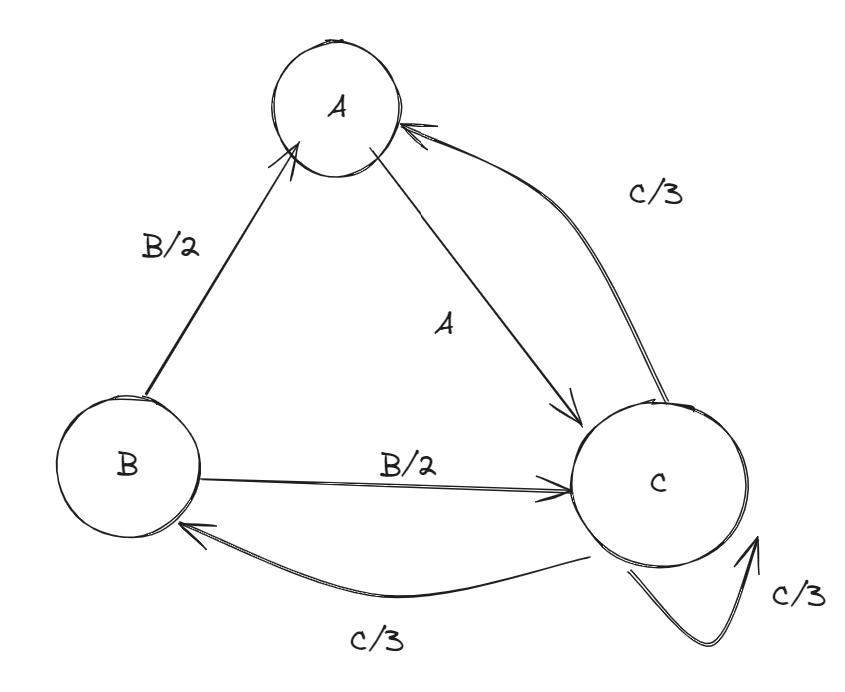



\begin{equation}
A = B/2 + C/3
\end{equation}
\begin{equation}
B = C/3
\end{equation}
\begin{equation}
C = A + B/2 + C/3
\end{equation}

Also it is taken as probability
\begin{equation}
A + B + C = 1
\end{equation}

Generating adjacency matrix

\begin{bmatrix}
  0 & 1 & 1\\
  0 & 0 & 1\\
  1 & 1 & 1\\
\end{bmatrix}

We take the summation of each column
\begin{bmatrix}
  1 & 2 & 3\\
\end{bmatrix}

Generating transition matrix

\begin{bmatrix}
  0 & 0.5 & 1/3\\
  0 & 0 & 1/3\\
  1 & 0.5 & 1/3\\
\end{bmatrix}


All websites have equall importance on the initial assumption

We have a rank vector r for the representation

In the beginning we assume

\begin{bmatrix}
  1/3 \\
  1/3 \\
  1/3
\end{bmatrix}


### Matrix multiplication of transition matrix and vector r of ranking will give the A,B,C values ranking of the pages


This can be verified by going through the equation derived in the beginning

The updated rank vector will replace

This iteration is repeated until we get a constant value



In this example we get
\begin{bmatrix}
0.269547 \\
0.18004115 \\\
0.55041152
\end{bmatrix}

Approximately we can conclude
A - 27% , B - 18%, C - 55%

## Other concepts to read
- Random Surfer Model
- Damping factor - random surfer will continously click on the link

In [6]:
import numpy as np

threshold = 0.000000000000000000000001 # stopping criteria for algorithm
beta = 0.8 # damping factor - random surfer
#  1 - beta : random surfer teleport

# Adjacency matrix
A = [[0,1,1],
     [0,0,1],
     [1,1,1]]

arr = np.array(A, dtype = float)
print("Adjacency matrix: ",arr)
s = [] # to store the sum of each column

for i in range(len(A)):
    s.append(np.sum(arr[:,i]))
print("s : ", s)

M = arr
# getting M as a column stochastic probability matrix
for j in range(len(A)):
    for i in range(len(A)):
        M[i][j] = M[i][j]/s[j]
print("M : ", M)

r_new = (1.0 + np.zeros([len(M),1]))/len(M) #initial rank vector
print("r initial", r_new)

# c - teleportation part of random surfer , constant vector
c = (1.0-beta)*r_new

r_prev = r_new

# Convergence 1000
for i in range(1,10000):
  print("Iteration :",i)
  r_new = beta*np.matmul(M,r_prev) + c
  print("Rank vector: ")
  print(r_new)
  diff = np.sum(abs(r_new-r_prev))
  if(diff < threshold):
    break
  r_prev = r_new

print("Final rank vector: ")
print(r_new[:,0])

Adjacency matrix:  [[0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 1.]]
s :  [1.0, 2.0, 3.0]
M :  [[0.         0.5        0.33333333]
 [0.         0.         0.33333333]
 [1.         0.5        0.33333333]]
r initial [[0.33333333]
 [0.33333333]
 [0.33333333]]
Iteration : 1
Rank vector: 
[[0.27777778]
 [0.11111111]
 [0.61111111]]
Iteration : 2
Rank vector: 
[[0.25925926]
 [0.2037037 ]
 [0.53703704]]
Iteration : 3
Rank vector: 
[[0.2808642 ]
 [0.17901235]
 [0.54012346]]
Iteration : 4
Rank vector: 
[[0.26954733]
 [0.18004115]
 [0.55041152]]
Iteration : 5
Rank vector: 
[[0.27349108]
 [0.18347051]
 [0.54303841]]
Iteration : 6
Rank vector: 
[[0.27274806]
 [0.1810128 ]
 [0.54623914]]
Iteration : 7
Rank vector: 
[[0.27258611]
 [0.18207971]
 [0.54533417]]
Iteration : 8
Rank vector: 
[[0.27281791]
 [0.18177806]
 [0.54540403]]
Iteration : 9
Rank vector: 
[[0.27269037]
 [0.18180134]
 [0.54550829]]
Iteration : 10
Rank vector: 
[[0.27273677]
 [0.1818361 ]
 [0.54542714]]
Iteration : 11
Rank vector: 
[[0.27272709]
 [

Note: If the beta = 1 ( no damping factor consideration) we get the result computed